In [2]:
#pip install keras

In [3]:
from keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

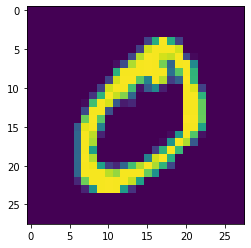

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [7]:
X_train = X_train.reshape(60000,28,28,1)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_test = X_test.reshape(10000,28,28,1)

In [10]:
y_train[1]

0

In [11]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
#create a model object
model = Sequential()
#add convolutinal layer
model.add(Conv2D(32,3,activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(64,5,activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))






In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [15]:
model.compile(optimizer= "adam", loss= "categorical_crossentropy", metrics= ["accuracy"])


In [16]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 86s 45ms/step - loss: 0.2988 - accuracy: 0.9514 - val_loss: 0.0748 - val_accuracy: 0.9754
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0604 - accuracy: 0.9814 - val_loss: 0.0548 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.0545 - val_accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0421 - accuracy: 0.9874 - val_loss: 0.0515 - val_accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.0520 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0511 - val_accuracy: 0.9854
Epoch 7/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.0594 -

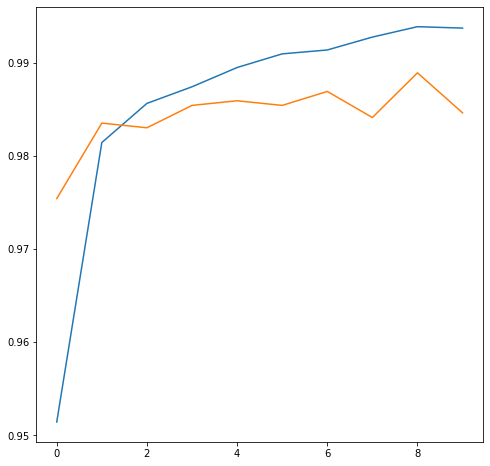

In [17]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epoch_range= range(10)
plt.figure(figsize = (8,8))
plt.plot(epoch_range,acc,label="Training_accuracy")
plt.plot(epoch_range,val_acc,label="Validation_Training_accuracy")
plt.show()

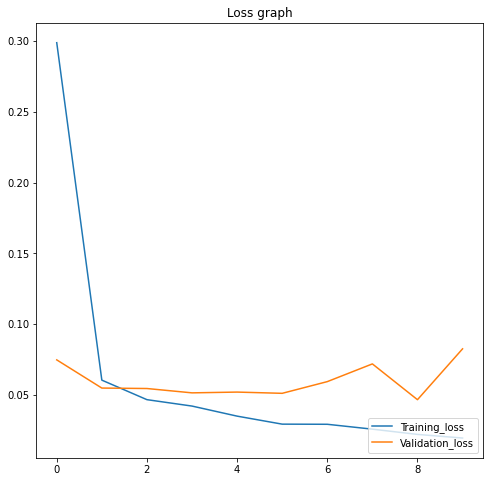

In [19]:
plt.figure(figsize = (8,8))
plt.plot(epoch_range,loss,label="Training_loss")
plt.plot(epoch_range,val_loss,label="Validation_loss")
plt.legend(loc="lower right")
plt.title("Loss graph")
plt.show()

In [21]:
y_test[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
model.predict(X_test[1:5])

array([[9.07896780e-09, 8.37600156e-10, 1.00000000e+00, 3.91202878e-14,
        8.20772183e-12, 2.53435965e-19, 1.94951646e-08, 1.34539064e-11,
        1.30606215e-09, 5.54142983e-17],
       [3.26408298e-24, 1.00000000e+00, 1.62110869e-19, 5.25354169e-20,
        1.46173546e-13, 4.24188639e-21, 4.29349751e-19, 4.06248521e-14,
        1.19229268e-12, 7.88784619e-22],
       [9.99994159e-01, 1.40184456e-16, 4.88686294e-13, 2.94499194e-16,
        5.05731450e-16, 2.78280119e-08, 5.74102887e-06, 3.56072363e-08,
        3.09720888e-10, 1.08852394e-13],
       [6.57599830e-38, 1.94656388e-29, 1.45118887e-30, 6.54462291e-36,
        1.00000000e+00, 1.16438197e-24, 1.47830037e-28, 1.17046994e-31,
        3.96971236e-28, 8.67827775e-24]], dtype=float32)

In [24]:
y_test[1:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)